Nome: Paloma Mirela dos Santos Rodrigues

RM: 551321

## Data Science - Linear Regression

Neste projeto, foi utilizado o conjunto de dados `Real estate.csv` para criar um modelo de Regressão Linear que prevê o valor da unidade de área com base na idade do imóvel.


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
real_estate = pd.read_csv("/content/Real estate.csv")

In [31]:
real_estate = real_estate.rename({'X1 transaction date': 'transaction_date', 'X2 house age': 'house_age', 'X3 distance to the nearest MRT station': 'distance_MRT', 'X4 number of convenience stores': 'num_convstores', 'X5 latitude': 'latitude', 'X6 longitude': 'longitude',  'Y house price of unit area': 'house_price_UA'}, axis=1)

In [32]:
real_estate.head()

,No,transaction_date,house_age,distance_MRT,num_convstores,latitude,longitude,house_price_UA
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [33]:
real_estate.columns

Index(['No', 'transaction_date', 'house_age', 'distance_MRT', 'num_convstores',
       'latitude', 'longitude', 'house_price_UA'],
      dtype='object')

In [34]:
data = real_estate[['house_age', 'house_price_UA']]

In [35]:
data = data.dropna()

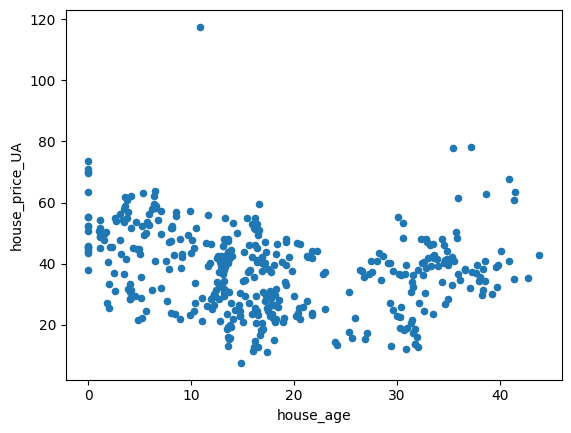

In [36]:
data.plot(kind='scatter', x='house_age',y='house_price_UA')
plt.show()

## Treinamento do Modelo

Os dados foram divididos em conjuntos de treino e teste, e um modelo de Regressão Linear foi treinado utilizando o `scikit-learn`.

* X_train e y_train são os dados de treino.
* X_test e y_test são os dados de teste.
* test_size=0.2 determina que 20% dos dados serão usados para teste.
* model.fit(X_train, y_train) ajusta o modelo de Regressão Linear aos dados de treino, encontrando os melhores parâmetros (coeficientes) que minimizam o erro entre as previsões do modelo e os valores reais de y_train.
* model.predict(X_test) usa os parâmetros ajustados durante o treinamento para prever os valores de y para os dados de teste X_test.

In [37]:
X = data[['house_age']]
y = data['house_price_UA']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)

## Visualização dos Resultados

O gráfico ilustra a linha de regressão em comparação com os dados reais de teste, evidenciando a relação linear entre a idade do imóvel e o valor por unidade de área, permitindo assim uma visualização clara dessa correlação.

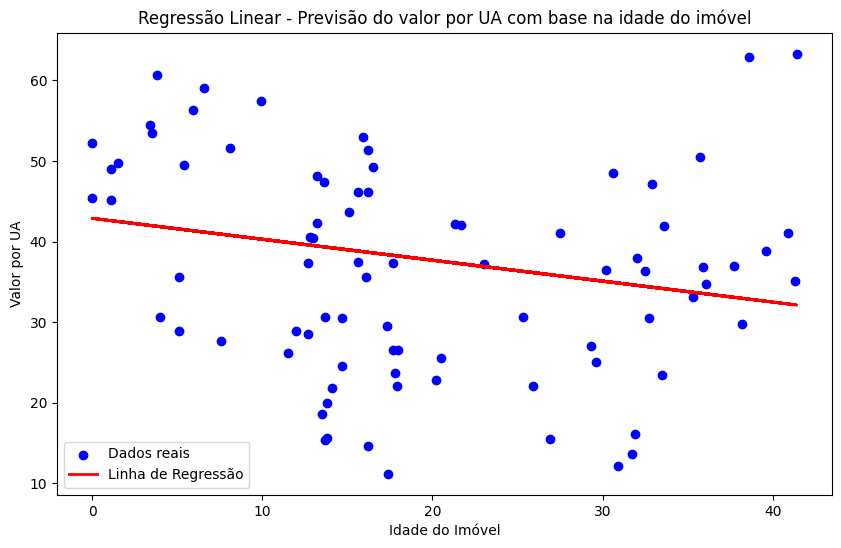

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Dados reais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linha de Regressão')
plt.xlabel('Idade do Imóvel')
plt.ylabel('Valor por UA')
plt.title('Regressão Linear - Previsão do valor por UA com base na idade do imóvel')
plt.legend()
plt.show()

## Observações Finais

O modelo desenvolvido é simples e baseia-se exclusivamente na idade do imóvel para prever o valor por Unidade de Área (UA). Embora capture a tendência geral de depreciação com o envelhecimento do imóvel, sua eficácia é limitada pela falta de outras variáveis influentes, como localização, proximidade a serviços, e infraestrutura.

Resultados Obtidos: Os resultados indicam que, de maneira geral, imóveis mais antigos tendem a ter valores por UA menores. No entanto, a precisão das previsões é limitada e pode não refletir todas as variáveis relevantes do mercado imobiliário. Portanto, os resultados devem ser interpretados com cautela e o modelo deve ser visto como uma ferramenta inicial de avaliação.

Em resumo, embora o modelo ofereça uma visão básica da relação entre a idade do imóvel e seu valor, ele precisa ser complementado com mais variáveis e dados para fornecer estimativas mais precisas e úteis.
